In [1]:
from SearchBasedTester.BasicClasses.InteractivePlotter import InteractivePlotter
from SearchBasedTester.BasicClasses.SampleBase import SampleBase
from SearchBasedTester.BasicClasses.FitnessBase import FitnessBase
import numpy as np
import matplotlib.pyplot as plt
# Autoload packages
%load_ext autoreload
%autoreload 2

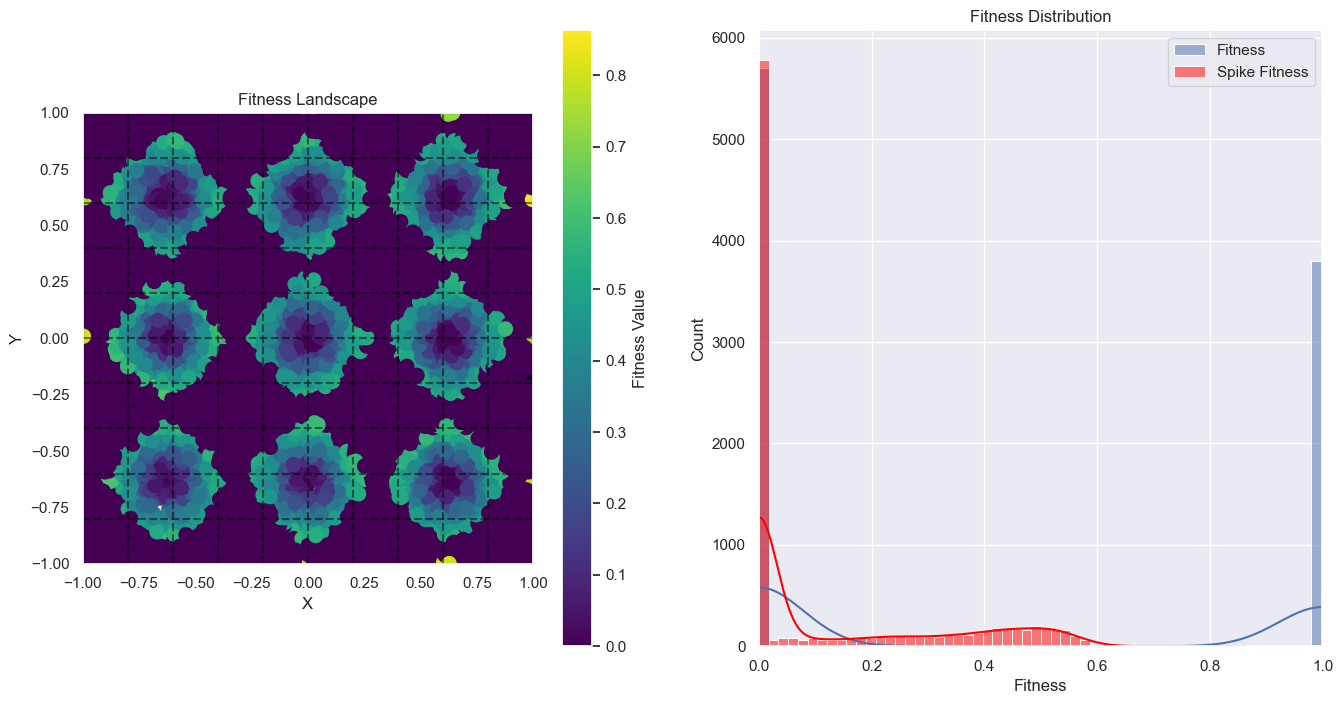

n Neighbours: 847
n Neighbours: 858
n Neighbours: 880
n Neighbours: 838
n Neighbours: 841
n Neighbours: 838
n Neighbours: 580
n Neighbours: 893
n Neighbours: 594
n Neighbours: 574
n Neighbours: 882
n Neighbours: 818
n Neighbours: 410
n Neighbours: 596
n Neighbours: 594
n Neighbours: 584
n Neighbours: 848
n Neighbours: 612
n Neighbours: 586
n Neighbours: 853
n Neighbours: 847
n Neighbours: 859
n Neighbours: 614
n Neighbours: 800
n Neighbours: 867
n Neighbours: 859
n Neighbours: 865
n Neighbours: 411
n Neighbours: 865
n Neighbours: 866
n Neighbours: 604
n Neighbours: 884
n Neighbours: 821
n Neighbours: 568
n Neighbours: 844
n Neighbours: 822
n Neighbours: 899
n Neighbours: 598
n Neighbours: 824
n Neighbours: 870
n Neighbours: 876
n Neighbours: 824
n Neighbours: 850
n Neighbours: 886


KeyboardInterrupt: 

In [50]:
radius = 0.2
sampleBase = SampleBase([(-1, 1), (-1, 1)], radius)
fitnessBase = FitnessBase()
spikeFitnessBase = FitnessBase()
# f = lambda x,y: (-np.sign(x**2 + y**2 - 0.1) + 1)/2
f = lambda x,y: (np.sign(np.cos(10 * x) + np.cos(10* y) - 0.1) + 1)/2
#f = lambda x,y: x**2 + y**2

interactivePlotter = InteractivePlotter()

def computeSpikeFitness(sample):
    if fitnessBase.getFitness(sample) == 0:
        return 0
    neighbours = sampleBase.getNeighbours(sample)
    distances = np.linalg.norm(neighbours - sample, axis=1)
    trueNeighbours = np.array(neighbours)[distances <= radius]
    spikeFitness = np.mean(fitnessBase.getFitnesses(trueNeighbours))
    return 1 - spikeFitness

refreshRate = 100
for i in range(10000):
    sample = np.random.uniform(-1, 1, 2)
    sampleBase.addSample(sample)
    fitness = f(sample[0], sample[1])
    fitnessBase.writeFitness(sample, fitness)
    neighbours = sampleBase.getNeighbours(sample)
    print('n Neighbours:', len(neighbours))
    distances = np.linalg.norm(neighbours - sample, axis=1)
    trueNeighbours = np.array(neighbours)[distances <= radius]
    spikeFitnesses = np.array([computeSpikeFitness(neighbour) for neighbour in trueNeighbours])
    for j, neighbour in enumerate(trueNeighbours):
        spikeFitness = spikeFitnesses[j]
        spikeFitnessBase.writeFitness(neighbour, spikeFitness)
    if i % refreshRate == 0:
        interactivePlotter(sampleBase, fitnessBase, spikeFitnessBase, f, radius)
